# Data Visualization Project - Loan Data From Prosper
## by Garett Hansen

## Preliminary Wrangling

> This data was provided by marketplace lending company Prosper and is comprised of 113,937 individual loans across a wide range of loan types (i.e. home improvement, auto, student, etc). While 81 different variables are attributed to each loan (i.e. interest rate, loan amount, credit rating, etc), only a subset of those variables will be analyzed.

> The purpose of this project is to utilize summary statistics and different forms of visualizations in order to understand the relationships between the aforementioned loan variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
loans.shape

(113937, 81)

In [4]:
loans.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/09 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/09 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> There are 113937 rows across 81 columns. Many of these columns contain no missing values; however, there are some columns with a substantial number of missing values. With a dataset this large, a certain amount of missing values is to be expected.

### What is/are the main feature(s) of interest in your dataset?

> This project will be focusing on variables that have a potential affect on the borrower's Annual Percentage Rate (APR).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think there is a high likelihood that variables such as credit score, income range, and loan amount have a direct impact on the borrower's APR. 

## Univariate Exploration

#### Annual Percentage Rate (APR)

In [7]:
#set base color for all future plots

base_color = sb.color_palette()[0]

In [8]:
#change APR to percentage format

loans['BorrowerAPR'] = loans['BorrowerAPR']*100
loans['BorrowerAPR'].head()

0    16.516
1    12.016
2    28.269
3    12.528
4    24.614
Name: BorrowerAPR, dtype: float64

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


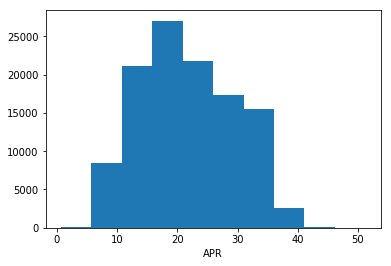

In [9]:
plt.hist(data = loans, x = 'BorrowerAPR')
plt.xlabel('APR');

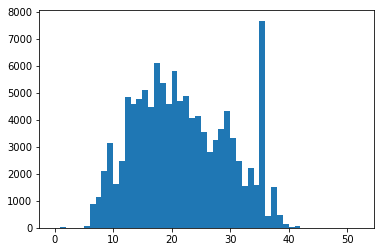

In [10]:
#while this appears to be skewed to the right, I want to see if there's more detail if we zoom in a bit

bins = np.arange(0, loans['BorrowerAPR'].max()+1, 1)

plt.hist(data = loans, x = 'BorrowerAPR', bins = bins);

> The first histogram shows a single peak hinting at a unimodal distribution. However, while both versions of the histogram give us a slightly skewed view of the APR, when setting the bins manually, there is a very sharp increase in APR at around the 36% mark.

> Next, we'll look at income range.

#### Income Range

In [11]:
#income ranges

inc_ranges = loans['IncomeRange'].value_counts()
inc_ranges

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

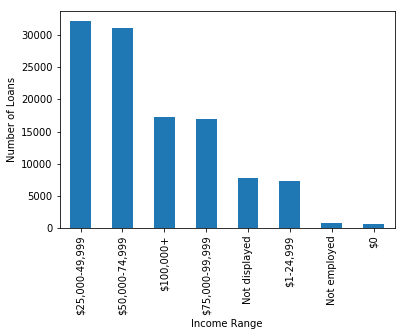

In [12]:
inc_ranges.plot(kind = 'bar', color = base_color)
plt.xlabel('Income Range')
plt.ylabel('Number of Loans');

> This data ranges from 0 to over 100,000 dollars. The income range with the highest number of loans is 25,000-49,00, but the range from 50,000-74,999 is a very close second. This data is also naturally displayed in a very interesting way in a quartile-like fashion in groups of two.

> Next up is loan amount.

#### Loan Amount

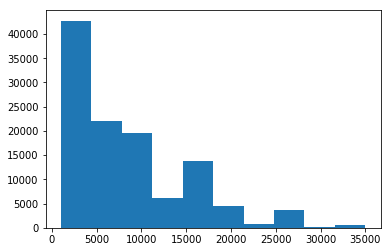

In [13]:
plt.hist(data = loans, x = 'LoanOriginalAmount');

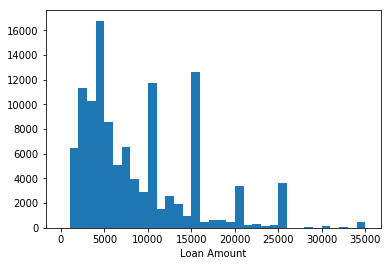

In [14]:
#create new plot with bin ranges to see more detail

bins = np.arange(0, loans['LoanOriginalAmount'].max()+250, 1000)
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount');

> This data is very skewed to the right, but interestingly there are severe peaks at every 5,000 increment from 5,000 to 25,000. This could be for a number of reasons. With that being said, the majority of loans fall under the 10,000 range (excluding the aforementioned peaks).

> Next up is credit score.

#### Credit Score

In [15]:
#calculate average credit score

avg_credit_score = loans[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)

#insert average credit score column after other credit score columns

loans.insert(loans.columns.get_loc('CreditScoreRangeUpper')+1, 'avg_credit_score', 
             avg_credit_score, allow_duplicates = False)

In [16]:
# check values

loans[['CreditScoreRangeLower', 'CreditScoreRangeUpper', 'avg_credit_score']].head(5)

,CreditScoreRangeLower,CreditScoreRangeUpper,avg_credit_score
0,640.0,659.0,649.5
1,680.0,699.0,689.5
2,480.0,499.0,489.5
3,800.0,819.0,809.5
4,680.0,699.0,689.5


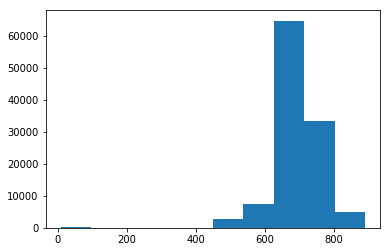

In [17]:
plt.hist(data = loans, x = 'avg_credit_score');

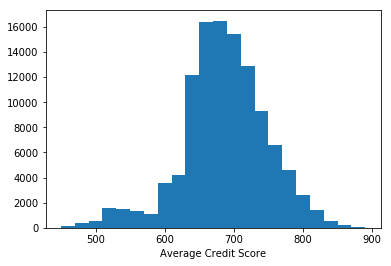

In [18]:
# set bin boundaries to concentrate on distribution

bins = np.arange(450, loans['avg_credit_score'].max()+10, 20)
plt.hist(data = loans, x = 'avg_credit_score', bins = bins)
plt.xlabel('Average Credit Score');

> The distribution of credit scores appears mostly unimodal with a peak around the 700 range. According to Experian, a "Fair" credit score falls between 580 and 669, and a "Good" credit score falls between 670 and 739. Based on these numbers, the majority of individuals fall in the upper-"Fair" and mid-"Good" categories.

In [19]:
# APR overall mean

loans['BorrowerAPR'].mean()

21.882765590983762

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> With an overall mean of 21.88%, it's interesting that the APR has such a large spike at around the 36% mark. It's also interesting that those with incomes ranges in the middle (25,000 - 75,000) are the ones with the most loans. Those making more money (75,000 +) have the next highest number, with the lowest income ranges coming in with the least number of loans. One of the most interesting distributions is how there are peaks at 5,000 increments in the loan amount plot.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The APR was converted to a standard percentage format for visual purposes. Because upper and lower credit scores were provided, an average credit score column was created to use for the analysis. Manual bin edges were set for the histograms in order to get a better representation of the data.

## Bivariate Exploration

> Next, we will compare APR to the other individual variables presented previously, starting with income range.

#### APR vs Income Range

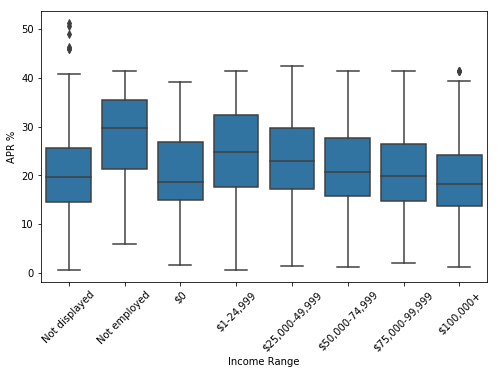

In [20]:
# order min -> max

inc_ordered = ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
               '$75,000-99,999', '$100,000+']

plt.figure(figsize = (8, 5))
sb.boxplot(data = loans, x = 'IncomeRange', y = 'BorrowerAPR', color = base_color, order = inc_ordered)
plt.xticks(rotation = 45)
plt.xlabel('Income Range')
plt.ylabel('APR %');

> Those labeled unemployed experience, perhaps unsurprisingly, the highest APR. It's possible that lenders perceive greater risk of non-repayment with these individuals. However, those listed with 0 income have a steep drop, which is interesting as you would think this would equate to the same risk as those listed as unemployed.

> From there, the general trend is the higher the income, the lower the APR.

#### APR vs Credit Score

In [21]:
loans[['avg_credit_score', 'BorrowerAPR']].describe()

,avg_credit_score,BorrowerAPR
count,113346.000000,113912.000000
mean,695.067731,21.882766
std,66.458275,8.036408
min,9.500000,0.653000
25%,669.500000,15.629000
50%,689.500000,20.976000
75%,729.500000,28.381000
max,889.500000,51.229000


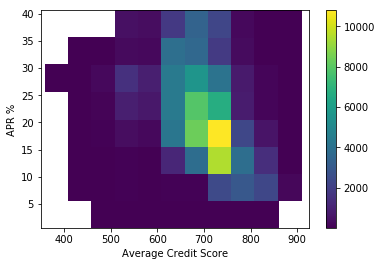

In [22]:
bins_x = np.arange(9.5, 990, 50)
bins_y = np.arange(.6, 45, 5)
plt.hist2d(data = loans, x = 'avg_credit_score', y = 'BorrowerAPR', cmin = 0.5, bins = [bins_x, bins_y])
plt.xlim(350, 925)
plt.colorbar()
plt.xlabel('Average Credit Score')
plt.ylabel('APR %');

> We can see again that the majority of customers' credit scores fall between the high-"fair" range and mid-"good" range. There appears to be a bit of a negative correlation between credit score and APR, meaning those with higher credit scores may be favored with lower APR.

#### APR vs Loan Amount

In [23]:
loans[['LoanOriginalAmount', 'BorrowerAPR']].describe()

,LoanOriginalAmount,BorrowerAPR
count,113937.00000,113912.000000
mean,8337.01385,21.882766
std,6245.80058,8.036408
min,1000.00000,0.653000
25%,4000.00000,15.629000
50%,6500.00000,20.976000
75%,12000.00000,28.381000
max,35000.00000,51.229000


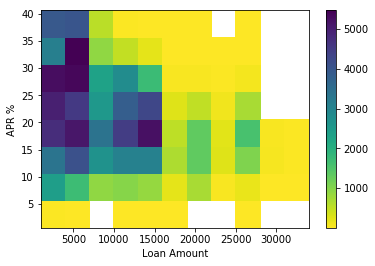

In [24]:
bins_x = np.arange(1000, 35000+1000, 3000)
bins_y = np.arange(.6, 45, 5)
plt.hist2d(data = loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Loan Amount')
plt.ylabel('APR %');

> Again we the trend of customers frequently choosing loans in increments of 5000, with a heavy concentration of all loans falling under 15000. There is a bit of a negative correlation here as well as the larger the loan size, the lower the APR.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> While some of the relationships matched my prior expectations (i.e. higher income leading to a lower APR), I expected a much stronger relationship between credit score and APR. While having a high credit score may possibly increase the chances of getting a loan, it may not necessarily lower how much you pay for that loan.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I think its interesting that "Not Employed" and having an income of 0 returned such different results when it comes to APR. Perhaps there are descriptions or other factors behind what these variables mean, but it's interesting nonetheless given the vast difference in APR between the two.

## Multivariate Exploration

#### APR vs Income Range and Credit Rating

In [25]:
# create credit score bins

credit_bins = [300, 579, 669, 739, 799, 850]
credit_names = ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

In [26]:
# new credit_rating column

loans['credit_rating'] = pd.cut(loans['avg_credit_score'], credit_bins, labels = credit_names)

loans[['avg_credit_score', 'credit_rating']].head()

,avg_credit_score,credit_rating
0,649.5,Fair
1,689.5,Good
2,489.5,Very Poor
3,809.5,Exceptional
4,689.5,Good


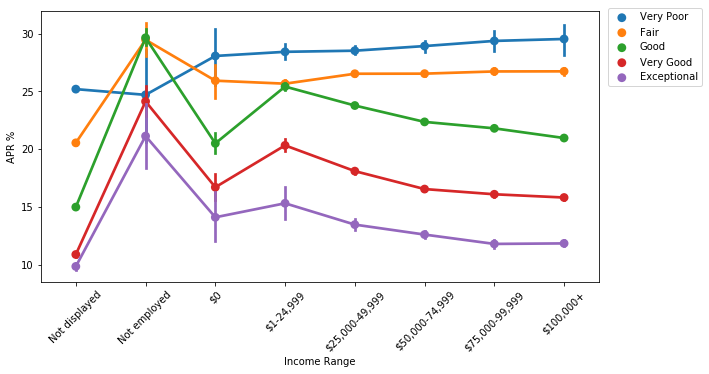

In [27]:
plt.figure(figsize = (10, 5))
sb.pointplot(data = loans, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'credit_rating', order = inc_ordered)
plt.xlabel('Income Range')
plt.ylabel('APR %')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, .9),
           bbox_transform=plt.gcf().transFigure);

> Interesting. When factoring annual income, those with a favorable credit rating consistently experienced a lower APR than those with less favorable credit ratings; however, while those with good, very good, or exceptional ratings experienced a lower APR as income increased, those with fair or very poor credit ratings experienced slightly similar or occasionally slightly higher APR as income increased.

#### APR vs Income Range and Loan Amount

In [28]:
loans['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [29]:
# create bins for loan sizes

size_bins = [1000, 4000, 6500, 12000, 35000]
size_names = ['Very Small', 'Small', 'Medium', 'Large']

In [30]:
# create new loan size column

loans['loan_size'] = pd.cut(loans['LoanOriginalAmount'], size_bins, labels = size_names)

loans[['LoanOriginalAmount', 'loan_size']].head()

,LoanOriginalAmount,loan_size
0,9425,Medium
1,10000,Medium
2,3001,Very Small
3,10000,Medium
4,15000,Large


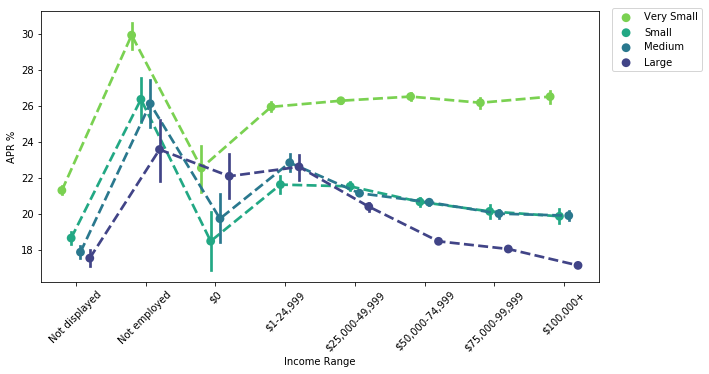

In [31]:
plt.figure(figsize = (10, 5))
sb.pointplot(data = loans, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'loan_size', order = inc_ordered, 
             palette = 'viridis_r', dodge = .4, linestyles = "--")
plt.xlabel('Income Range')
plt.ylabel('APR %')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, .9),
           bbox_transform=plt.gcf().transFigure);

> Again we see that unemployed borrowers experience some of the highest APR rates, regardless of loan size. Very small loans (1000-4000) experience the highest rates for those with a provided income, although the rates do rise and lower slightly depending on income range. Small and medium-sized loans experience very similar APR rates for those with reported income and are nearly identical for those earning above 50,0000. Perhaps unsurprisingly, those with high incomes and large loan sizes enjoy some of the lowest rates.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between credit score/credit rating became more apparent when combined with another factor, in this case income range. In earlier plots, the credit score did not appear to have a very strong correlation with APR, but when utilizing a multivariate plot, we can see that those with credit ratings of "Good" or above tend to be rewarded with lower APR rates, regardless of income range.

>Those with high reported income also tend to be favored with lower APR rates, but there are exceptions (see below).

### Were there any interesting or surprising interactions between features?

> It's interesting that even borrowers with high reported income experienced very high APR rates when their credit rating was "Fair" or "Very Poor". These borrowers sometimes even experienced higher rates than those with less income that fell inside the same credit rating groups.

> There's a similar trend with small loans. High earners experienced similar, or possibly even higher, APR rates for these loans. While one could perceive repayment risk being low for a small loan under a high earner, this does not appear to be reflected in this dataset.

### Sources

Credit score data from Experian (https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/)